# Wikipedia Notable Life Expectancy
## Notebook  13: Modeling for Regression -- Prediction Emphasis
### Context

The
### Objective

The
### Data Dictionary
- Feature: Description

### Importing Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
# import sqlite3 as sql

# To save/open python objects in pickle file
import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np

# To help with categorical typecasting
from pandas.api.types import CategoricalDtype

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
# from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

# To help with model building
from sklearn.tree import DecisionTreeRegressor

# from sklearn.linear_model import LinearRegression

from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    BaggingRegressor,
)
from xgboost import XGBRegressor

# To randomly split data, for cross validation, and to check model performance
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
)

# To be used for tuning the model
from sklearn.model_selection import RandomizedSearchCV

# To be used for hyperparameter tuning searches
from scipy.stats import loguniform
from scipy.stats import uniform
from scipy.stats import expon

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 211)

# To set some dataframe visualization attributes
pd.set_option("max_colwidth", 150)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# To set some plot visualization attributes
sns.set_theme()
sns.set(font_scale=1.4)
sns.set_palette(
    (
        "midnightblue",
        "goldenrod",
        "maroon",
        "darkolivegreen",
        "cadetblue",
        "tab:purple",
        "yellowgreen",
    )
)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### [Reading](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_train_preproc.csv), Sampling, and Checking Data Shape

In [2]:
# Reading the dataset
data = pd.read_csv("wp_life_expect_train_preproc.csv")

# Making a working copy
df = data.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 77624 rows and 20 columns.


,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
0,4,73.0,0,0,1,0,0,0,0,0,0,0,1,5329.0,0.250000,8,64,Europe,No Prior Region,spiritual
1,3,90.0,1,0,0,1,0,0,0,0,0,0,2,8100.0,0.333333,13,169,North America,No Prior Region,two


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
77622,7,74.0,0,0,0,0,0,1,0,0,0,0,1,5476.0,0.142857,0,0,North America,No Prior Region,arts
77623,5,92.0,0,0,0,0,0,0,1,0,0,0,1,8464.0,0.200000,8,64,Europe,No Prior Region,sports


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
68449,3,80.0,0,0,0,0,0,1,0,0,0,0,1,6400.0,0.333333,24,576,Europe,No Prior Region,arts
65669,9,85.0,0,0,0,0,0,1,0,0,0,0,1,7225.0,0.111111,22,484,Europe,No Prior Region,arts
17568,10,68.0,0,0,0,0,0,1,0,0,0,0,1,4624.0,0.100000,18,324,South East Asia,No Prior Region,arts
27856,5,76.0,0,0,0,0,0,0,1,0,0,0,1,5776.0,0.200000,17,289,North America,No Prior Region,sports
80,10,89.0,1,0,0,0,0,0,0,0,0,0,1,7921.0,0.100000,5,25,North America,Europe,sciences


<IPython.core.display.Javascript object>

### Checking Data Types and Null Values

In [5]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77624 entries, 0 to 77623
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_references             77624 non-null  int64  
 1   age                        77624 non-null  float64
 2   sciences                   77624 non-null  int64  
 3   social                     77624 non-null  int64  
 4   spiritual                  77624 non-null  int64  
 5   academia_humanities        77624 non-null  int64  
 6   business_farming           77624 non-null  int64  
 7   arts                       77624 non-null  int64  
 8   sports                     77624 non-null  int64  
 9   law_enf_military_operator  77624 non-null  int64  
 10  politics_govt_law          77624 non-null  int64  
 11  crime                      77624 non-null  int64  
 12  num_categories             77624 non-null  int64  
 13  age_sqrd                   77624 non-null  flo

<IPython.core.display.Javascript object>

#### Observations:
- With our dataset loaded, we are ready for modeling.
- We have three variables that need typcasting from object to category, then one hot encoding just prior to modeling.

#### Typecasting `region`, `prior_region`, and `known_for` as Categorical

In [6]:
# Typcasting prior_region and region as categorical
df[["prior_region", "region", "known_for"]] = df[
    ["prior_region", "region", "known_for"]
].astype("category")

# Re-check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77624 entries, 0 to 77623
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_references             77624 non-null  int64   
 1   age                        77624 non-null  float64 
 2   sciences                   77624 non-null  int64   
 3   social                     77624 non-null  int64   
 4   spiritual                  77624 non-null  int64   
 5   academia_humanities        77624 non-null  int64   
 6   business_farming           77624 non-null  int64   
 7   arts                       77624 non-null  int64   
 8   sports                     77624 non-null  int64   
 9   law_enf_military_operator  77624 non-null  int64   
 10  politics_govt_law          77624 non-null  int64   
 11  crime                      77624 non-null  int64   
 12  num_categories             77624 non-null  int64   
 13  age_sqrd                   7762

<IPython.core.display.Javascript object>

## Data Preparation for Modeling
In contrast to building the [linear regression model](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_olsmodel_thanak_2022_10_9.ipynb), we will be tuning these models.  So, we will split the train set into train and validation sets and utilize the `test` set only to check out-of-sample performance of the champion model.  We will load and treat the test set at that point.

### Defining Independent and Dependent Variables for Train and Validation Sets

In [7]:
# Creating list of predictor columns
predictor_cols = [
    "num_references",
    "years",
    "region",
    "prior_region",
    "known_for",
]

# Defining target column
target = "age"

# Defining independent and dependent variables
X = df[predictor_cols]
y = df[target]

# One hot encoding of categorical predictors and typecasting all predictors as float
X = pd.get_dummies(X, drop_first=True).astype("float64")

# Splitting into 70:30 train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking shape of train and validation sets
print(
    f"There are {X_train.shape[0]} rows and {X_train.shape[1]} columns in the train set.\n"
)
print(
    f"There are {X_val.shape[0]} rows and {X_val.shape[1]} columns in the validation set.\n"
)

# Checking a sample
X_train.sample()

There are 54336 rows and 34 columns in the train set.

There are 23288 rows and 34 columns in the validation set.



,num_references,years,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
76911,3.0,24.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

## Model Building
#### Model Evaluation Criterion
The predictions made by the regressors will have the following performance metrics:
- RMSE
- MAE
- R$^2$
- Ajusted R$^2$
- MAPE

#### Which Metric to Optimize?
- For hyperparameter tuning, we will optimize R$^2$, which is the proportion of variation in the target that is explained by the predictors.  
- Adjusted R$^2$ is the metric that represents the amount of variation in the target that is explained by the predictors, with a penalty for more predictors.  R$^2$ will improve with the addition of predictors, even if they contribute very little to the model, whereas, the penalty in Adjusted R$^2$ offsets such an increase.  
- We will most likely choose a champion model based on direct comparison of R$^2$, as the models will have the same features included, with the exception of a decision tree regressor.  If decision tree does become a candidate, we will consider Adjusted R$^2$.

#### Functions for Checking and Tuning Model Performance

In [8]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs((targets - predictions) / targets)) * 100


# Function to compute and display different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute and return a dataframe of different metrics to check
    regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # Predictions
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)  # To compute MAE
    mape = mape_score(target, pred)  # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

#### Defining Scorer for Cross-validation and Hyperparameter Tuning

In [9]:
# Type of scoring used to compare parameter combinations--maximizing Adj R-squared
scorer = "r2"

<IPython.core.display.Javascript object>

### Building the Models

In [10]:
%%time

# Creating list to store the models
models = []

# Appending models to the list
models.append(('Dtree', DecisionTreeRegressor(random_state=42)))

models.append(('Random Forest', RandomForestRegressor(random_state=42)))

models.append(('Bagging Dtree', BaggingRegressor(random_state=42)))

models.append(('GBM', GradientBoostingRegressor(random_state=42)))

models.append(('AdaBoost Dtree', AdaBoostRegressor(random_state=42)))

models.append(('XGB_gbtree', XGBRegressor(random_state=42)))

models.append(('XGB_gblinear', XGBRegressor(random_state=42, booster='gblinear')))

# Create empty list to store all model's names and CV scores
names = []
results = []

# Loop through all models to get the mean cross validated score
print("\n" "Cross-Validation:" "\n")

for name, model in models:
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=5
    )
    results.append(cv_result)
    names.append(name)
    print(f"{name}: {cv_result.mean()}")
    
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = r2_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation:

Dtree: -0.3729288388785845
Random Forest: -0.06498999161620542
Bagging Dtree: -0.09780574269930184
GBM: 0.10092407348408765
AdaBoost Dtree: -0.041942386214516916
XGB_gbtree: 0.08816799208071073
XGB_gblinear: 0.08304470514611988

Validation Performance:

Dtree: -0.3725798827812159
Random Forest: -0.06593088660036917
Bagging Dtree: -0.09925861808350978
GBM: 0.10355465508610728
AdaBoost Dtree: -0.05608653156428711
XGB_gbtree: 0.09146574210948322
XGB_gblinear: 0.08707144033391556
CPU times: total: 3min 9s
Wall time: 1min 9s


<IPython.core.display.Javascript object>

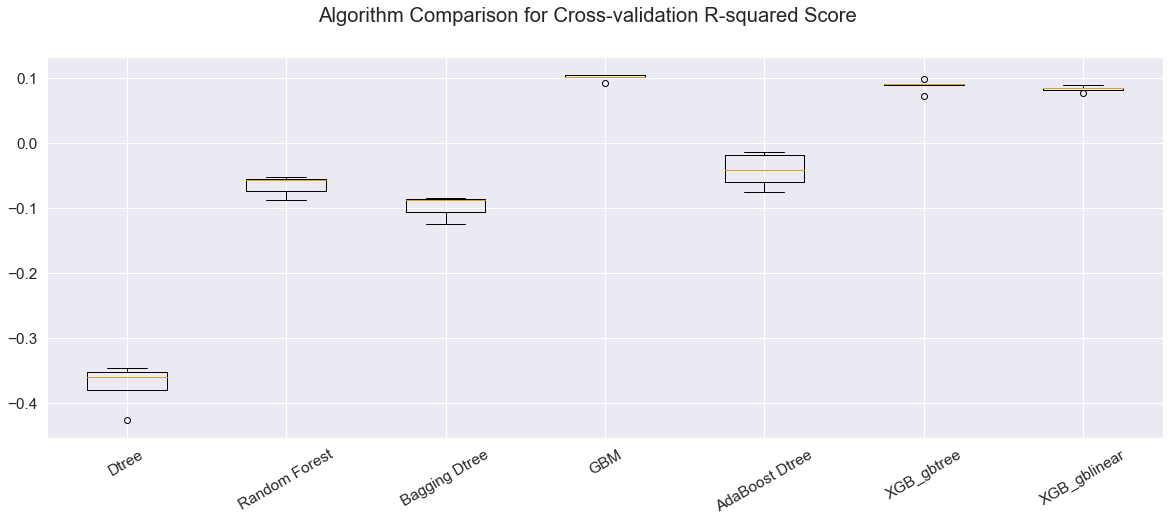

<IPython.core.display.Javascript object>

In [11]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(20, 7))

fig.suptitle("Algorithm Comparison for Cross-validation R-squared Score")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=30)

plt.show()

#### Observations:
- We have negative R$^2$ values for four of the models.  This means they are performing worse than a model that merely equates the predicted values to the constant mean value of the target.
- The remaining three models, *GBM*, *XGB_gbtree*, and *XGB_gblinear* are giving generalized performances on train and validation sets, with similar, albeit very low, R$^2$ scores as [*olsmodel3*](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_olsmodel_thanak_2022_10_9.ipynb) (0.088).  Before hyperparameter tuning, *GBM* is outperforming the other models, including *olsmodel3*, with both train and validation R$^2$ scores of ~0.10.
- We will perform hyperparameter tuning on the top 3 models.  As an exercise, we will also keep *Random Forest* in the mix.

#### Collecting Models with Best Performance

In [12]:
# List of top models so far
top_models = [models[1]] + [models[3]] + models[-2:]

<IPython.core.display.Javascript object>

#### Creating Dataframes to Compare Training and Validation Performance of Best Models

In [13]:
# Creating empty dictionary to hold the models
models_to_tune = {}

# For loop to add models to dictionary
for model in top_models:
    key = model[0]
    value = model[1]
    models_to_tune[key] = value

# Initializing dataframes to compare performance of all models
models_train_comp_df = pd.DataFrame()
models_val_comp_df = pd.DataFrame()

# For loop to add performance results of each top model
for name, model in models_to_tune.items():
    models_train_comp_df[name] = model_performance_regression(model, X_train, y_train).T
    models_val_comp_df[name] = model_performance_regression(model, X_val, y_val).T

<IPython.core.display.Javascript object>

#### Comparing Top Models Before Hyperparameter Tuning

In [14]:
# Comparing train performance
print(f"Training Performance:")
models_train_comp_df

Training Performance:


,Random Forest,GBM,XGB_gbtree,XGB_gblinear
RMSE,11.686697,14.971421,14.237993,15.176245
MAE,8.736482,11.627512,11.034927,11.786491
R-squared,0.456950,0.108786,0.193965,0.084233
Adj. R-squared,0.456610,0.108228,0.193461,0.083660
MAPE,13.944396,19.221156,18.032207,19.426525


<IPython.core.display.Javascript object>

In [15]:
# Comparing validation performance
print(f"Validation Performance:")
models_val_comp_df

Validation Performance:


,Random Forest,GBM,XGB_gbtree,XGB_gblinear
RMSE,16.271584,14.922006,15.022284,15.058569
MAE,12.558769,11.580272,11.632590,11.698609
R-squared,-0.065931,0.103555,0.091466,0.087071
Adj. R-squared,-0.067489,0.102244,0.090137,0.085737
MAPE,20.193462,19.051063,19.008358,19.182797


<IPython.core.display.Javascript object>

#### Observations:
- Here, we compare the performance on the full train set to the validation set.
- Only *GBM* and *XGB_gblinear* are giving generalized performances on the two sets.
- These two are performing on par or slightly better than [*olsmodel3*](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_olsmodel_thanak_2022_10_9.ipynb), our linear regression model, for all metrics.
- We will see if hyperparameter tuning improves their performance, again keeping *Random Forest* and *XGB_gbtree* in the mix for demonstration and comparison.

## Hyperparameter Tuning

### *Random Forest Tuned*

In [16]:
# Confirming the model
models_to_tune["Random Forest"]

RandomForestRegressor(random_state=42)

<IPython.core.display.Javascript object>

In [17]:
%%time

# Defining model
Model = RandomForestRegressor(random_state=42)

# Parameter grid to pass in RandomizedSearchCV
param_grid = { 
    "n_estimators": np.arange(100, 500), 
    "min_samples_leaf": [None] + np.arange(1, 10).tolist(),
    "max_features": ['sqrt'], 
    "max_samples": uniform(loc=0.3, scale=0.5),
    'criterion': ['squared_error'],
    "max_depth": [None]
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=42,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Chime notification when cell successfully executes
chime.success()

Best parameters are {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'max_samples': 0.3909124836035503, 'min_samples_leaf': 4, 'n_estimators': 260} with CV score=0.09967033141183923:
CPU times: total: 2.83 s
Wall time: 56.9 s


<IPython.core.display.Javascript object>

In [18]:
# Building model with best parameters
Random_Forest_tuned = RandomForestRegressor(
    criterion="squared_error",
    max_depth=None,
    max_features="sqrt",
    max_samples=0.3909124836035503,
    min_samples_leaf=4,
    n_estimators=260,
)

# Fit the model on training data
Random_Forest_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', max_samples=0.3909124836035503,
                      min_samples_leaf=4, n_estimators=260)

<IPython.core.display.Javascript object>

In [19]:
# Calculating different metrics
Random_Forest_tuned_train_perf = model_performance_regression(
    Random_Forest_tuned, X_train, y_train
)
print("Training performance:\n", Random_Forest_tuned_train_perf)
Random_Forest_tuned_val_perf = model_performance_regression(
    Random_Forest_tuned, X_val, y_val
)
print("\nValidation performance:\n", Random_Forest_tuned_val_perf)

# Adding model to model comparison dataframes
models_train_comp_df["Random Forest Tuned"] = Random_Forest_tuned_train_perf.T
models_val_comp_df["Random Forest Tuned"] = Random_Forest_tuned_val_perf.T

Training performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.585952  11.329522   0.154087        0.153557  18.742804

Validation performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.955767  11.602186   0.099494        0.098177  19.098842


<IPython.core.display.Javascript object>

#### Observations:
- Hyperparameter tuning improved performance for *Random Forest*.
- The algorithm is still overfitting the train set, compared to the validation set.
- Note that we had a 10% fit fail during cross-validation ("UserWarning: One or more of the test scores are non-finite..") indicating cross-validation had some folds for which hyperparameter combinations led to Nan values.  We are going to allow it here, and go with the results of the successful iterations.  The warning messages were suppressed for the last run of this notebook.

### *GBM Tuned*

In [20]:
# Confirming the model
models_to_tune["GBM"]

GradientBoostingRegressor(random_state=42)

<IPython.core.display.Javascript object>

In [21]:
%%time

# Defining model
Model = GradientBoostingRegressor(random_state=42)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(100, 500),
    "learning_rate": loguniform(0.001, 1),
    "subsample": uniform(loc=0.3, scale=0.5),
    "max_features": uniform(loc=0.3, scale=0.5),
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=100,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=42,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Chime notification when cell successfully executes
chime.success()

Best parameters are {'learning_rate': 0.08171272700715591, 'max_features': 0.6630456668613307, 'n_estimators': 368, 'subsample': 0.7847684335570795} with CV score=0.1063224214498147:
CPU times: total: 13.4 s
Wall time: 5min 59s


<IPython.core.display.Javascript object>

In [22]:
# Building model with best parameters
GBM_tuned = GradientBoostingRegressor(
    random_state=42,
    learning_rate=0.08171272700715591,
    max_features=0.6630456668613307,
    n_estimators=368,
    subsample=0.7847684335570795,
)

# Fit the model on training data
GBM_tuned.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.08171272700715591,
                          max_features=0.6630456668613307, n_estimators=368,
                          random_state=42, subsample=0.7847684335570795)

<IPython.core.display.Javascript object>

In [23]:
# Calculating different metrics
GBM_tuned_train_perf = model_performance_regression(GBM_tuned, X_train, y_train)
print("Training performance:\n", GBM_tuned_train_perf)
GBM_tuned_val_perf = model_performance_regression(GBM_tuned, X_val, y_val)
print("\nValidation performance:\n", GBM_tuned_val_perf)

# Adding model to model comparison dataframes
models_train_comp_df["GBM Tuned"] = GBM_tuned_train_perf.T
models_val_comp_df["GBM Tuned"] = GBM_tuned_val_perf.T

Training performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.835035  11.521845   0.124949        0.124401  18.989296

Validation performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.877704  11.542386    0.10887        0.107567  18.937928


<IPython.core.display.Javascript object>

#### Observations:
- The performance for *GBM* is improved with hyperparameter tuning.  
- There is a slight increase in overfitting, but the validation metrics are better.

### *XGB_gbtree Tuned*

In [24]:
# Confirming the model
models_to_tune["XGB_gbtree"]

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [25]:
%%time

# Defining model
Model = XGBRegressor(random_state=42, booster='gbtree')

# Parameter grid to pass in RandomizedSearchCV
param_grid={
    'n_estimators': np.arange(100, 500),
    "learning_rate": uniform(0.1, 0.3), # aka eta
    'gamma': expon(), # aka min_split_loss
    'subsample': uniform(loc=0.6, scale=0.2), # proportion of train set to randomly sample prior to growing trees
    'max_depth': np.arange(3, 8).tolist(),
    'colsample_bytree': uniform(loc=0.3, scale=0.5)
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=100,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=42,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Chime notification when cell successfully executes
chime.success()

Best parameters are {'colsample_bytree': 0.42649508399462055, 'gamma': 1.188792356281234, 'learning_rate': 0.12263036412693079, 'max_depth': 3, 'n_estimators': 404, 'subsample': 0.7391497377969234} with CV score=0.10679644601394585:
CPU times: total: 1min 6s
Wall time: 19min 47s


<IPython.core.display.Javascript object>

In [26]:
# Building model with best parameters
XGB_gbtree_tuned = XGBRegressor(
    booster="gbtree",
    random_state=42,
    colsample_bytree=0.42649508399462055,
    gamma=1.188792356281234,
    learning_rate=0.12263036412693079,
    max_depth=3,
    n_estimators=404,
    subsample=0.7391497377969234,
)

# Fit the model on training data
XGB_gbtree_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.42649508399462055, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=1.188792356281234, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.12263036412693079, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=404, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=42, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [27]:
# Calculating different metrics
XGB_gbtree_tuned_train_perf = model_performance_regression(
    XGB_gbtree_tuned, X_train, y_train
)
print("Training performance:\n", XGB_gbtree_tuned_train_perf)
XGB_gbtree_tuned_val_perf = model_performance_regression(XGB_gbtree_tuned, X_val, y_val)
print("\nValidation performance:\n", XGB_gbtree_tuned_val_perf)

# Adding model to model comparison dataframes
models_train_comp_df["XGB_gbtree Tuned"] = XGB_gbtree_tuned_train_perf.T
models_val_comp_df["XGB_gbtree Tuned"] = XGB_gbtree_tuned_val_perf.T

Training performance:
         RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  14.813429  11.50438   0.127496         0.12695  18.953973

Validation performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.882834  11.546377   0.108255        0.106951  18.931955


<IPython.core.display.Javascript object>

#### Observations:
- The performance for *XGB_gbtree* is improved with hyperparameter tuning.  
- There is a slight increase in overfitting, but the validation metrics are better.

### *XGB_gblinear Tuned*

In [28]:
# Confirming the model
models_to_tune["XGB_gblinear"]

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=42,
             reg_alpha=0, reg_lambda=0, ...)

<IPython.core.display.Javascript object>

In [29]:
%%time

# Defining model
Model = XGBRegressor(random_state=42, booster='gblinear')

# Parameter grid to pass in RandomizedSearchCV
param_grid={
    'n_estimators': np.arange(100, 500),
    'reg_lambda': loguniform(.0001, 1)
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=100,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=42,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Chime notification when cell successfully executes
chime.success()

Best parameters are {'n_estimators': 439, 'reg_lambda': 0.0009206654892274761} with CV score=0.09196572057161607:
CPU times: total: 39.4 s
Wall time: 4min 40s


<IPython.core.display.Javascript object>

In [30]:
# Building model with best parameters
XGB_gblinear_tuned = XGBRegressor(
    booster="gblinear",
    random_state=42,
    n_estimators=439,
    reg_lambda=0.0009206654892274761,
)

# Fit the model on training data
XGB_gblinear_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=439, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=42,
             reg_alpha=0, reg_lambda=0.0009206654892274761, ...)

<IPython.core.display.Javascript object>

In [31]:
# Calculating different metrics
XGB_gblinear_tuned_train_perf = model_performance_regression(
    XGB_gblinear_tuned, X_train, y_train
)
print("Training performance:\n", XGB_gblinear_tuned_train_perf)
XGB_gblinear_tuned_val_perf = model_performance_regression(
    XGB_gblinear_tuned, X_val, y_val
)
print("\nValidation performance:\n", XGB_gblinear_tuned_val_perf)

# Adding model to model comparison dataframes
models_train_comp_df["XGB_gblinear Tuned"] = XGB_gblinear_tuned_train_perf.T
models_val_comp_df["XGB_gblinear Tuned"] = XGB_gblinear_tuned_val_perf.T

Training performance:
         RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  15.103268  11.72932   0.093019        0.092452  19.393489

Validation performance:
         RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  14.995251  11.640131   0.094733        0.093409  19.15207


<IPython.core.display.Javascript object>

#### Observations:
- *XGB_gblinear* also has improved performance with hyperparameter tuning.
- Let us compare the models, before and after hyperparameter tuning.

## Model Performance Comparison

### Performance of Various Models Tuned and Untuned

In [32]:
# Displaying train performance of all models
print("Train Performance Comparison:")
models_train_comp_df.sort_index(axis=1)

Train Performance Comparison:


,GBM,GBM Tuned,Random Forest,Random Forest Tuned,XGB_gblinear,XGB_gblinear Tuned,XGB_gbtree,XGB_gbtree Tuned
RMSE,14.971421,14.835035,11.686697,14.585952,15.176245,15.103268,14.237993,14.813429
MAE,11.627512,11.521845,8.736482,11.329522,11.786491,11.729320,11.034927,11.504380
R-squared,0.108786,0.124949,0.456950,0.154087,0.084233,0.093019,0.193965,0.127496
Adj. R-squared,0.108228,0.124401,0.456610,0.153557,0.083660,0.092452,0.193461,0.126950
MAPE,19.221156,18.989296,13.944396,18.742804,19.426525,19.393489,18.032207,18.953973


<IPython.core.display.Javascript object>

In [33]:
# Displaying validation performance of all models
print("Validation Performance Comparison:")
models_val_comp_df.sort_index(axis=1)

Validation Performance Comparison:


,GBM,GBM Tuned,Random Forest,Random Forest Tuned,XGB_gblinear,XGB_gblinear Tuned,XGB_gbtree,XGB_gbtree Tuned
RMSE,14.922006,14.877704,16.271584,14.955767,15.058569,14.995251,15.022284,14.882834
MAE,11.580272,11.542386,12.558769,11.602186,11.698609,11.640131,11.632590,11.546377
R-squared,0.103555,0.108870,-0.065931,0.099494,0.087071,0.094733,0.091466,0.108255
Adj. R-squared,0.102244,0.107567,-0.067489,0.098177,0.085737,0.093409,0.090137,0.106951
MAPE,19.051063,18.937928,20.193462,19.098842,19.182797,19.152070,19.008358,18.931955


<IPython.core.display.Javascript object>

#### Observations:
- *GBM Tuned* has the highest R$^2$ (0.109) on the validation set, followed by *XGB_gbtree Tuned*, then *GBM*.
- As we did not include the Decision Tree here, we can ignore Adjusted R$^2$, and just compare R$^2$.
- Of the three models with R$^2$ scores over 10, there is some variation in overfitting.

#### Comparison of Percentage of Overfitting for R$^2$

In [34]:
# Subtracting the ratio of validation R-square/train R-square from 1
overfit_perc = (
    1
    - (
        models_val_comp_df.loc["R-squared", :]
        / models_train_comp_df.loc["R-squared", :]
    )
) * 100

print(f"Percentage of R-square overfitting:")
overfit_perc.sort_values()

Percentage of R-square overfitting:


XGB_gblinear            -3.369217
XGB_gblinear Tuned      -1.841764
GBM                      4.808487
GBM Tuned               12.868707
XGB_gbtree Tuned        15.091493
Random Forest Tuned     35.430160
XGB_gbtree              52.844295
Random Forest          114.428464
Name: R-squared, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
- *XGB_gblinear* and *XGB_gblinear Tuned* both performed better on the validation set, than the training set, which is interesting.
- Of the top 3 models for R$^2$ score, *GBM* generalized considerably better than *GBM Tuned* and *XGB_gtree Tuned*.  
- That said, *GBM Tuned* has the highest R$^2$ score on the validation set.
- Next we will try another modeling iteration, replacing the one hot encoded `known_for` predictor with the original `known for` category columns.  For linear regression, we grouped entries with multiple `known for` categories into classes to reduce dimensionality.  We retained that approach for the above modeling iteration, but for this iteration we will allow entries to have their original multiple categories.  We will also include the `num_categories` feature in this iteration.

## 2nd Modeling Iteration with Original `known for` Category Columns and `num_features`

### Defining Independent and Dependent Variables for Train and Validation Sets

In [35]:
# Creating list of predictor columns
predictor_cols = [
    "num_references",
    "years",
    "region",
    "prior_region",
    "sciences",
    "social",
    "spiritual",
    "academia_humanities",
    "business_farming",
    "arts",
    "sports",
    "law_enf_military_operator",
    "politics_govt_law",
    "crime",
    "num_categories",
]

# Defining target column
target = "age"

# Defining independent and dependent variables
X = df[predictor_cols]
y = df[target]

# One hot encoding of categorical predictors and typecasting all predictors as float
X = pd.get_dummies(X, drop_first=True).astype("float64")

# Splitting into 70:30 train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking shape of train and validation sets
print(
    f"There are {X_train.shape[0]} rows and {X_train.shape[1]} columns in the train set.\n"
)
print(
    f"There are {X_val.shape[0]} rows and {X_val.shape[1]} columns in the validation set.\n"
)

# Checking a sample
X_train.sample()

There are 54336 rows and 34 columns in the train set.

There are 23288 rows and 34 columns in the validation set.



,num_references,years,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia
9268,7.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

#### Defining Scorer for Cross-validation and Hyperparameter Tuning

In [36]:
# Type of scoring used to compare parameter combinations--maximizing Adj R-squared
scorer = "r2"

<IPython.core.display.Javascript object>

### Building the Models

In [37]:
%%time

# Creating list to store the models
models = []

# Appending models to the list
models.append(('Dtree2', DecisionTreeRegressor(random_state=42)))

models.append(('Random Forest2', RandomForestRegressor(random_state=42)))

models.append(('Bagging Dtree2', BaggingRegressor(random_state=42)))

models.append(('GBM2', GradientBoostingRegressor(random_state=42)))

models.append(('AdaBoost Dtree2', AdaBoostRegressor(random_state=42)))

models.append(('XGB_gbtree2', XGBRegressor(random_state=42)))

models.append(('XGB_gblinear2', XGBRegressor(random_state=42, booster='gblinear')))

# Create empty list to store all model's names and CV scores
names = []
results = []

# Loop through all models to get the mean cross validated score
print("\n" "Cross-Validation:" "\n")

for name, model in models:
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=5
    )
    results.append(cv_result)
    names.append(name)
    print(f"{name}: {cv_result.mean()}")
    
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = r2_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation:

Dtree2: -0.39988031150791087
Random Forest2: -0.055391943965687626
Bagging Dtree2: -0.09151226074998306
GBM2: 0.10458496917399238
AdaBoost Dtree2: -0.04659101299906472
XGB_gbtree2: 0.09199892946363704
XGB_gblinear2: 0.08818035818041123

Validation Performance:

Dtree2: -0.3874580410488391
Random Forest2: -0.05737130520636269
Bagging Dtree2: -0.09428953449035293
GBM2: 0.10690165941428653
AdaBoost Dtree2: -0.08047644155074885
XGB_gbtree2: 0.09741681484821774
XGB_gblinear2: 0.090979276948844
CPU times: total: 3min 55s
Wall time: 1min 29s


<IPython.core.display.Javascript object>

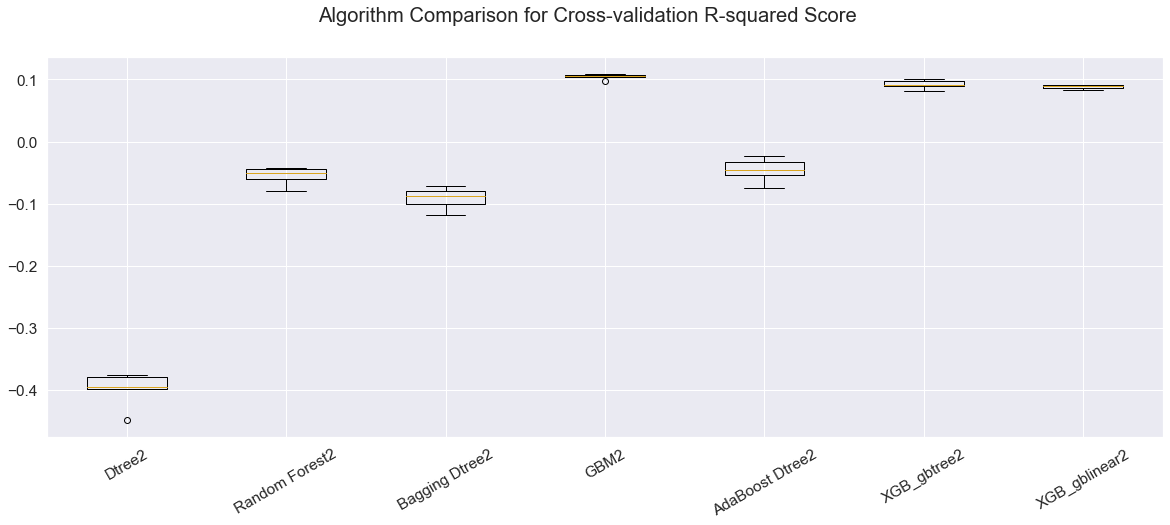

<IPython.core.display.Javascript object>

In [38]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(20, 7))

fig.suptitle("Algorithm Comparison for Cross-validation R-squared Score")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=30)

plt.show()

#### Observations:
- So far, the performances are similar to the first modeling iteration above.
- We will perform hyperparameter tuning on the top 3 models and again keep *Random Forest2* in the mix.

#### Collecting Models with Best Performance

In [39]:
# List of top models so far
top_models = [models[1]] + [models[3]] + models[-2:]

<IPython.core.display.Javascript object>

#### Creating Dataframes to Compare Training and Validation Performance of Best Models

In [40]:
# Creating empty dictionary to hold the models
models_to_tune = {}

# For loop to add models to dictionary
for model in top_models:
    key = model[0]
    value = model[1]
    models_to_tune[key] = value

# For loop to add performance results of each top model
for name, model in models_to_tune.items():
    models_train_comp_df[name] = model_performance_regression(model, X_train, y_train).T
    models_val_comp_df[name] = model_performance_regression(model, X_val, y_val).T

<IPython.core.display.Javascript object>

#### Comparing Top Models Before Hyperparameter Tuning

In [41]:
# Comparing train performance
print(f"Training Performance:")
models_train_comp_df[[key for key in models_to_tune.keys()]]

Training Performance:


,Random Forest2,GBM2,XGB_gbtree2,XGB_gblinear2
RMSE,11.328976,14.937480,14.196740,15.129844
MAE,8.362030,11.599899,10.984573,11.741797
R-squared,0.489686,0.112822,0.198629,0.089825
Adj. R-squared,0.489367,0.112266,0.198128,0.089255
MAPE,13.404005,19.178492,17.982195,19.384322


<IPython.core.display.Javascript object>

In [42]:
# Comparing validation performance
print(f"Validation Performance:")
models_val_comp_df[[key for key in models_to_tune.keys()]]

Validation Performance:


,Random Forest2,GBM2,XGB_gbtree2,XGB_gblinear2
RMSE,16.206121,14.894124,14.973004,15.026305
MAE,12.476262,11.552854,11.582826,11.654886
R-squared,-0.057371,0.106902,0.097417,0.090979
Adj. R-squared,-0.058917,0.105596,0.096097,0.089650
MAPE,20.071146,19.011210,18.941080,19.158340


<IPython.core.display.Javascript object>

#### Observations:
- Here, we compare the performance on the full train set to the validation set.
- As with the first iteration above, only *GBM2* and *XGB_gblinear2* are giving generalized performances on the two sets.
- We will proceed with hyperparameter tuning.

## Hyperparameter Tuning

### *Random Forest2 Tuned*

In [43]:
# Confirming the model
models_to_tune["Random Forest2"]

RandomForestRegressor(random_state=42)

<IPython.core.display.Javascript object>

In [44]:
%%time

# Defining model
Model = RandomForestRegressor(random_state=42)

# Parameter grid to pass in RandomizedSearchCV
param_grid = { 
    "n_estimators": np.arange(100, 500), 
    "min_samples_leaf": [None] + np.arange(1, 10).tolist(),
    "max_features": ['sqrt'], 
    "max_samples": uniform(loc=0.3, scale=0.5),
    'criterion': ['squared_error'],
    "max_depth": [None]
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=42,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Chime notification when cell successfully executes
chime.success()

Best parameters are {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'max_samples': 0.7162213204002108, 'min_samples_leaf': 5, 'n_estimators': 485} with CV score=0.10627175102316326:
CPU times: total: 7.98 s
Wall time: 1min 11s


<IPython.core.display.Javascript object>

In [45]:
# Building model with best parameters
Random_Forest2_tuned = RandomForestRegressor(
    criterion="squared_error",
    max_depth=None,
    max_features="sqrt",
    max_samples=0.7162213204002108,
    min_samples_leaf=5,
    n_estimators=485,
)

# Fit the model on training data
Random_Forest2_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', max_samples=0.7162213204002108,
                      min_samples_leaf=5, n_estimators=485)

<IPython.core.display.Javascript object>

In [46]:
# Calculating different metrics
Random_Forest2_tuned_train_perf = model_performance_regression(
    Random_Forest2_tuned, X_train, y_train
)
print("Training performance:\n", Random_Forest2_tuned_train_perf)
Random_Forest2_tuned_val_perf = model_performance_regression(
    Random_Forest2_tuned, X_val, y_val
)
print("\nValidation performance:\n", Random_Forest2_tuned_val_perf)

# Adding model to model comparison dataframes
models_train_comp_df["Random Forest2 Tuned"] = Random_Forest2_tuned_train_perf.T
models_val_comp_df["Random Forest2 Tuned"] = Random_Forest2_tuned_val_perf.T

Training performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.488353  11.251028    0.16537        0.164847  18.600499

Validation performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.903635  11.556405   0.105761        0.104453  19.016562


<IPython.core.display.Javascript object>

#### Observations:
- Hyperparameter tuning improved performance for *Random Forest2*.
- The algorithm is still overfitting the train set, compared to the validation set.
- Note that we again had a 10% fit fail during cross-validation ("UserWarning: One or more of the test scores are non-finite..") indicating cross-validation had some folds for which hyperparameter combinations led to Nan values.  We are going to allow it here, and go with the results of the successful iterations.  Warning messages were suppressed for the last run of this notebook.

### *GBM2 Tuned*

In [47]:
# Confirming the model
models_to_tune["GBM2"]

GradientBoostingRegressor(random_state=42)

<IPython.core.display.Javascript object>

In [48]:
%%time

# Defining model
Model = GradientBoostingRegressor(random_state=42)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(100, 500),
    "learning_rate": loguniform(0.001, 1),
    "subsample": uniform(loc=0.3, scale=0.5),
    "max_features": uniform(loc=0.3, scale=0.5),
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=100,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=42,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Chime notification when cell successfully executes
chime.success()

Best parameters are {'learning_rate': 0.08171272700715591, 'max_features': 0.6630456668613307, 'n_estimators': 368, 'subsample': 0.7847684335570795} with CV score=0.11041556668246581:
CPU times: total: 14.8 s
Wall time: 7min 53s


<IPython.core.display.Javascript object>

In [49]:
# Building model with best parameters
GBM2_tuned = GradientBoostingRegressor(
    random_state=42,
    learning_rate=0.08171272700715591,
    max_features=0.6630456668613307,
    n_estimators=368,
    subsample=0.7847684335570795,
)

# Fit the model on training data
GBM2_tuned.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.08171272700715591,
                          max_features=0.6630456668613307, n_estimators=368,
                          random_state=42, subsample=0.7847684335570795)

<IPython.core.display.Javascript object>

In [50]:
# Calculating different metrics
GBM2_tuned_train_perf = model_performance_regression(GBM2_tuned, X_train, y_train)
print("Training performance:\n", GBM2_tuned_train_perf)
GBM2_tuned_val_perf = model_performance_regression(GBM2_tuned, X_val, y_val)
print("\nValidation performance:\n", GBM2_tuned_val_perf)

# Adding model to model comparison dataframes
models_train_comp_df["GBM2 Tuned"] = GBM2_tuned_train_perf.T
models_val_comp_df["GBM2 Tuned"] = GBM2_tuned_val_perf.T

Training performance:
         RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  14.803396  11.49037   0.128678        0.128132  18.95094

Validation performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.853802  11.512155   0.111731        0.110432  18.898856


<IPython.core.display.Javascript object>

#### Observations:
- The performance for *GBM2* is improved with hyperparameter tuning.  

### *XGB_gbtree2 Tuned*

In [51]:
# Confirming the model
models_to_tune["XGB_gbtree2"]

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [52]:
%%time

# Defining model
Model = XGBRegressor(random_state=42, booster='gbtree')

# Parameter grid to pass in RandomizedSearchCV
param_grid={
    'n_estimators': np.arange(100, 500),
    "learning_rate": uniform(0.1, 0.3), # aka eta
    'gamma': expon(), # aka min_split_loss
    'subsample': uniform(loc=0.6, scale=0.2), # proportion of train set to randomly sample prior to growing trees
    'max_depth': np.arange(3, 8).tolist(),
    'colsample_bytree': uniform(loc=0.3, scale=0.5)
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=100,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=42,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Chime notification when cell successfully executes
chime.success()

Best parameters are {'colsample_bytree': 0.6861223846483286, 'gamma': 0.22153944050588595, 'learning_rate': 0.10165663513708073, 'max_depth': 5, 'n_estimators': 180, 'subsample': 0.74226839054973} with CV score=0.11086998659519617:
CPU times: total: 47 s
Wall time: 21min 38s


<IPython.core.display.Javascript object>

In [53]:
# Building model with best parameters
XGB_gbtree2_tuned = XGBRegressor(
    booster="gbtree",
    random_state=42,
    colsample_bytree=0.6861223846483286,
    gamma=0.22153944050588595,
    learning_rate=0.10165663513708073,
    max_depth=5,
    n_estimators=180,
    subsample=0.74226839054973,
)

# Fit the model on training data
XGB_gbtree2_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.6861223846483286, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=0.22153944050588595, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.10165663513708073, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=180, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=42, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [54]:
# Calculating different metrics
XGB_gbtree2_tuned_train_perf = model_performance_regression(
    XGB_gbtree2_tuned, X_train, y_train
)
print("Training performance:\n", XGB_gbtree2_tuned_train_perf)
XGB_gbtree2_tuned_val_perf = model_performance_regression(
    XGB_gbtree2_tuned, X_val, y_val
)
print("\nValidation performance:\n", XGB_gbtree2_tuned_val_perf)

# Adding model to model comparison dataframes
models_train_comp_df["XGB_gbtree2 Tuned"] = XGB_gbtree2_tuned_train_perf.T
models_val_comp_df["XGB_gbtree2 Tuned"] = XGB_gbtree2_tuned_val_perf.T

Training performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.596533  11.326033   0.152859        0.152329  18.630614

Validation performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.867475  11.517005   0.110095        0.108794  18.881056


<IPython.core.display.Javascript object>

#### Observations:
- The performance for *XGB_gbtree2* is improved with hyperparameter tuning.  

### *XGB_gblinear2 Tuned*

In [55]:
# Confirming the model
models_to_tune["XGB_gblinear2"]

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=42,
             reg_alpha=0, reg_lambda=0, ...)

<IPython.core.display.Javascript object>

In [56]:
%%time

# Defining model
Model = XGBRegressor(random_state=42, booster='gblinear')

# Parameter grid to pass in RandomizedSearchCV
param_grid={
    'n_estimators': np.arange(100, 500),
    'reg_lambda': loguniform(.0001, 1)
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=100,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=42,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Chime notification when cell successfully executes
chime.success()

Best parameters are {'n_estimators': 439, 'reg_lambda': 0.0009206654892274761} with CV score=0.09239924785728368:
CPU times: total: 45.5 s
Wall time: 5min 55s


<IPython.core.display.Javascript object>

In [57]:
# Building model with best parameters
XGB_gblinear2_tuned = XGBRegressor(
    booster="gblinear",
    random_state=42,
    n_estimators=439,
    reg_lambda=0.0009206654892274761,
)

# Fit the model on training data
XGB_gblinear2_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=439, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=42,
             reg_alpha=0, reg_lambda=0.0009206654892274761, ...)

<IPython.core.display.Javascript object>

In [58]:
# Calculating different metrics
XGB_gblinear2_tuned_train_perf = model_performance_regression(
    XGB_gblinear2_tuned, X_train, y_train
)
print("Training performance:\n", XGB_gblinear2_tuned_train_perf)
XGB_gblinear2_tuned_val_perf = model_performance_regression(
    XGB_gblinear2_tuned, X_val, y_val
)
print("\nValidation performance:\n", XGB_gblinear2_tuned_val_perf)

# Adding model to model comparison dataframes
models_train_comp_df["XGB_gblinear2 Tuned"] = XGB_gblinear2_tuned_train_perf.T
models_val_comp_df["XGB_gblinear2 Tuned"] = XGB_gblinear2_tuned_val_perf.T

Training performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  15.100468  11.725589   0.093356        0.092788  19.392007

Validation performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  15.007971  11.641101   0.093196         0.09187  19.169141


<IPython.core.display.Javascript object>

#### Observations:
- The performance of *XGB_gblinear2* is improved with hyperparameter tuning.
- Let us compare the performance of this iteration's models before and after hyperparameter tuning.

## Model Performance Comparison

### Performance of Various Models Tuned and Untuned

In [59]:
# Displaying train performance of all models
print("Train Performance Comparison:")
cols = [column for column in models_train_comp_df.columns if "2" in column]
models_train_comp_df[cols].sort_index(axis=1)

Train Performance Comparison:


,GBM2,GBM2 Tuned,Random Forest2,Random Forest2 Tuned,XGB_gblinear2,XGB_gblinear2 Tuned,XGB_gbtree2,XGB_gbtree2 Tuned
RMSE,14.937480,14.803396,11.328976,14.488353,15.129844,15.100468,14.196740,14.596533
MAE,11.599899,11.490370,8.362030,11.251028,11.741797,11.725589,10.984573,11.326033
R-squared,0.112822,0.128678,0.489686,0.165370,0.089825,0.093356,0.198629,0.152859
Adj. R-squared,0.112266,0.128132,0.489367,0.164847,0.089255,0.092788,0.198128,0.152329
MAPE,19.178492,18.950940,13.404005,18.600499,19.384322,19.392007,17.982195,18.630614


<IPython.core.display.Javascript object>

In [60]:
# Displaying validation performance of all models
print("Validation Performance Comparison:")
models_val_comp_df[cols].sort_index(axis=1)

Validation Performance Comparison:


,GBM2,GBM2 Tuned,Random Forest2,Random Forest2 Tuned,XGB_gblinear2,XGB_gblinear2 Tuned,XGB_gbtree2,XGB_gbtree2 Tuned
RMSE,14.894124,14.853802,16.206121,14.903635,15.026305,15.007971,14.973004,14.867475
MAE,11.552854,11.512155,12.476262,11.556405,11.654886,11.641101,11.582826,11.517005
R-squared,0.106902,0.111731,-0.057371,0.105761,0.090979,0.093196,0.097417,0.110095
Adj. R-squared,0.105596,0.110432,-0.058917,0.104453,0.089650,0.091870,0.096097,0.108794
MAPE,19.011210,18.898856,20.071146,19.016562,19.158340,19.169141,18.941080,18.881056


<IPython.core.display.Javascript object>

#### Observations:
- We see improvement across the board with hyperparameter tuning.  Even *Random Forest2* improved sufficiently to be a contender.
- Let us thin out the model contenders to those with validation R$^2$ scores of at least 0.105, from both modeling iterations.

### Performance of Contender Models

In [61]:
# Displaying train performance of contender models
print("Train Performance Comparison:")
cols = [
    column
    for column in models_train_comp_df.columns
    if models_val_comp_df.loc["R-squared", column] >= 0.105
]
models_train_comp_df[cols].sort_index(axis=1)

Train Performance Comparison:


,GBM Tuned,GBM2,GBM2 Tuned,Random Forest2 Tuned,XGB_gbtree Tuned,XGB_gbtree2 Tuned
RMSE,14.835035,14.937480,14.803396,14.488353,14.813429,14.596533
MAE,11.521845,11.599899,11.490370,11.251028,11.504380,11.326033
R-squared,0.124949,0.112822,0.128678,0.165370,0.127496,0.152859
Adj. R-squared,0.124401,0.112266,0.128132,0.164847,0.126950,0.152329
MAPE,18.989296,19.178492,18.950940,18.600499,18.953973,18.630614


<IPython.core.display.Javascript object>

In [62]:
# Displaying validation performance of contender models
print("Validation Performance Comparison:")
models_val_comp_df[cols].sort_index(axis=1)

Validation Performance Comparison:


,GBM Tuned,GBM2,GBM2 Tuned,Random Forest2 Tuned,XGB_gbtree Tuned,XGB_gbtree2 Tuned
RMSE,14.877704,14.894124,14.853802,14.903635,14.882834,14.867475
MAE,11.542386,11.552854,11.512155,11.556405,11.546377,11.517005
R-squared,0.108870,0.106902,0.111731,0.105761,0.108255,0.110095
Adj. R-squared,0.107567,0.105596,0.110432,0.104453,0.106951,0.108794
MAPE,18.937928,19.011210,18.898856,19.016562,18.931955,18.881056


<IPython.core.display.Javascript object>

#### Observations:
- *GBM* and *GBM Tuned* have one additional feature than the other models, after one hot encoding.  Therefore Ajusted $R^2$ is more relevant here comparing those two models with the others, than previously.
- Regardless, the top models are the same for R$^2$ and Adjusted R$^2$, *GBM2 Tuned*, followed by *XGB_gtree2 Tuned*, then *GBM Tuned*.
- Using the original `known for` category columns instead of `known_for`, with the inclusion of `num_categories`, brought the validation R$^2$ scores over 0.11 for two of the models.
- There is some variation in overfitting between the contender models.

#### Comparison of Percentage of Overfit for All 4 Metrics

In [63]:
# Subtracting the ratio of validation R-square/train R-square from 1
overfit_perc = pd.DataFrame()
overfit_perc["R-squared % overfit"] = np.round(
    (
        1
        - (
            models_val_comp_df[cols].T["R-squared"]
            / models_train_comp_df[cols].T["R-squared"]
        )
    )
    * 100,
    1,
)
for metric in ["RMSE", "MAE", "MAPE"]:
    overfit_perc[f"{metric} % overfit"] = np.round(
        (1 - (models_train_comp_df.T[metric] / models_val_comp_df.T[metric])) * 100, 1
    )

overfit_perc["% Overfit Average of 4 Metrics"] = np.round(
    overfit_perc.sum(axis=1) / 4, 1
)

print(f"Percentage of Overfit:")
overfit_perc.sort_values(by="R-squared % overfit")

Percentage of Overfit:


,R-squared % overfit,RMSE % overfit,MAE % overfit,MAPE % overfit,% Overfit Average of 4 Metrics
GBM2,5.2,-0.3,-0.4,-0.9,0.9
GBM Tuned,12.9,0.3,0.2,-0.3,3.3
GBM2 Tuned,13.2,0.3,0.2,-0.3,3.4
XGB_gbtree Tuned,15.1,0.5,0.4,-0.1,4.0
XGB_gbtree2 Tuned,28.0,1.8,1.7,1.3,8.2
Random Forest2 Tuned,36.0,2.8,2.6,2.2,10.9


<IPython.core.display.Javascript object>

#### Observations:
- Of the candidate models for R$^2$ score, *GBM2* gives the most generalized performance.
- That said, *GBM2 Tuned* has the highest R$^2$ score on the validation set, followed by *XGB_gbtree2 Tuned*.  
- With limited performance across the board, we will aim to eke out as much predictive capacity as possible by choosing *GBM2 Tuned* as the champion model and *XGB_gbtree2 Tuned* as the challenger.
- It's time to check our champion model's performance on the test set.

### Champion Model *GBM2 Tuned* Performance on Test Set

#### Reading the [Preprocessed Test Set](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_test_preproc.csv)

In [64]:
# Reading the test set
test_data = pd.read_csv("wp_life_expect_test_preproc.csv")

# Making a working copy
test = test_data.copy()

# Checking shape
print(f"There are {test.shape[0]} rows and {test.shape[1]} columns.")

There are 19420 rows and 20 columns.


<IPython.core.display.Javascript object>

In [65]:
# Checking a sample of rows
test.sample(2)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
475,5,80.0,0,0,0,0,0,1,0,0,0,0,1,6400.0,0.200000,20,400,South America,No Prior Region,arts
15182,15,82.0,0,0,0,1,0,1,0,0,0,0,2,6724.0,0.066667,1,1,North America,No Prior Region,two


<IPython.core.display.Javascript object>

#### Checking Data Types and Null Values

In [66]:
# Checking info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19420 entries, 0 to 19419
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_references             19420 non-null  int64  
 1   age                        19420 non-null  float64
 2   sciences                   19420 non-null  int64  
 3   social                     19420 non-null  int64  
 4   spiritual                  19420 non-null  int64  
 5   academia_humanities        19420 non-null  int64  
 6   business_farming           19420 non-null  int64  
 7   arts                       19420 non-null  int64  
 8   sports                     19420 non-null  int64  
 9   law_enf_military_operator  19420 non-null  int64  
 10  politics_govt_law          19420 non-null  int64  
 11  crime                      19420 non-null  int64  
 12  num_categories             19420 non-null  int64  
 13  age_sqrd                   19420 non-null  flo

<IPython.core.display.Javascript object>

#### Observations:
- The test set was preprocessed in the [olsmodel notebook](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_olsmodel_thanak_2022_10_9.ipynb) and has no missing values.
- We will typecast object type features as category.

#### Typecasting `region`, `prior_region`, and `known_for` as Categorical

In [67]:
# Typecasting object type features as categorical
test[["region", "prior_region", "known_for"]] = test[
    ["region", "prior_region", "known_for"]
].astype("category")

# Recheck info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19420 entries, 0 to 19419
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_references             19420 non-null  int64   
 1   age                        19420 non-null  float64 
 2   sciences                   19420 non-null  int64   
 3   social                     19420 non-null  int64   
 4   spiritual                  19420 non-null  int64   
 5   academia_humanities        19420 non-null  int64   
 6   business_farming           19420 non-null  int64   
 7   arts                       19420 non-null  int64   
 8   sports                     19420 non-null  int64   
 9   law_enf_military_operator  19420 non-null  int64   
 10  politics_govt_law          19420 non-null  int64   
 11  crime                      19420 non-null  int64   
 12  num_categories             19420 non-null  int64   
 13  age_sqrd                   1942

<IPython.core.display.Javascript object>

#### Observations:
- We are ready to define independent and dependent variables.

In [68]:
# Creating list of predictor columns
predictor_cols = [
    "num_references",
    "years",
    "region",
    "prior_region",
    "sciences",
    "social",
    "spiritual",
    "academia_humanities",
    "business_farming",
    "arts",
    "sports",
    "law_enf_military_operator",
    "politics_govt_law",
    "crime",
    "num_categories",
]

# Defining target column
target = "age"

# Defining independent and dependent variables
X_test = test[predictor_cols]
y_test = test[target]

# One hot encoding of categorical predictors and typecasting all predictors as float
X_test = pd.get_dummies(X_test, drop_first=True).astype("float64")

# Checking shape of train and validation sets
print(
    f"There are {X_test.shape[0]} rows and {X_test.shape[1]} columns in the train set.\n"
)

# Checking a sample
X_test.sample()

There are 19420 rows and 34 columns in the train set.



,num_references,years,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia
11066,5.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

#### Checking *GBM2_Tuned* Performance on Test Set

In [69]:
# Checking performance of champion model on test set
GBM2_tuned_test_perf = model_performance_regression(GBM2_tuned, X_test, y_test)
print("Test performance:\n", GBM2_tuned_test_perf)

# Creating test and train performance df
champion_df = pd.DataFrame()
champion_df["GBM2 Tuned Train"] = GBM2_tuned_train_perf.T
champion_df["GBM2 Tuned Test"] = GBM2_tuned_test_perf.T
champion_df.drop("Adj. R-squared", inplace=True)

Test performance:
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  14.790026  11.483625   0.110572        0.109012  18.724429


<IPython.core.display.Javascript object>

In [70]:
# Performance on train and test sets
champion_df.loc[["RMSE", "MAE", "MAPE"], "% Overfit"] = np.round(
    (1 - (champion_df.iloc[[0, 1, 3], 0] / champion_df.iloc[[0, 1, 3], 1])) * 100, 2
)
champion_df.loc["R-squared", "% Overfit"] = np.round(
    (1 - champion_df.iloc[2, 1] / champion_df.iloc[2, 0]) * 100, 2
)

print(
    f"Average overfit of the 4 metrics is {np.round(champion_df['% Overfit'].sum()/4,1)}%."
)
champion_df

Average overfit of the 4 metrics is 3.2%.


,GBM2 Tuned Train,GBM2 Tuned Test,% Overfit
RMSE,14.803396,14.790026,-0.09
MAE,11.490370,11.483625,-0.06
R-squared,0.128678,0.110572,14.07
MAPE,18.950940,18.724429,-1.21


<IPython.core.display.Javascript object>

#### Observations:
- *GBM2 Tuned*'s performance is holding up on the unseen test data.
- We have a model that explains ~11.1% of the variation in life span of notable Wikipedia individuals, who meet inclusion criteria.
- The model predicts life expectancy within average errors of ~11.5 years and ~18.7%.
- Let us check the most important predictive features of the model.

### Feature Importance of *GBM2 Tuned*

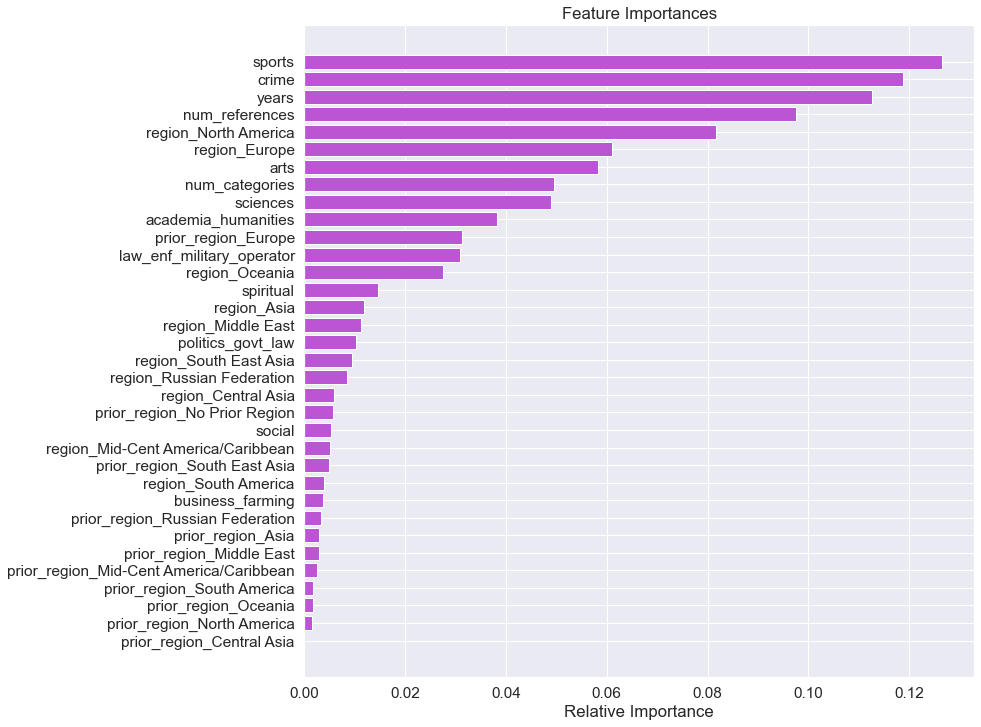

<IPython.core.display.Javascript object>

In [71]:
# Plotting feature importances of final model
feature_names = X_train.columns
importances = GBM2_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(
    range(len(indices)), importances[indices], color="mediumorchid", align="center"
)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
- The top 7 features of the model for predicting life span of a notable individual are (known for) `sports`, (known for) `crime`, `years`, `num_references`, `region_North America`, `region_Europe`, and (known for) `arts`, in that order.
- Recall from EDA that being known for `crime`, `sports`, or `arts` is associated with shorter life span.  Both in EDA and with our linear regression model, we saw that `age` increases with `years`, yet decreases with `num_references`.  Similarly, in [*olsmodel3*](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_olsmodel_thanak_2022_10_9.ipynb), the combined class of `region_Europe_OR_North_America_OR_Asia` was associated with longer life span (~10 year increase).
- So, the feature importances for our champion model, *GBM2 Tuned* are not surprising.
- Of the 34 predictor variables, 33 have predictive value in the model.  `prior_region_Central_Asia` is the exception.
- The next step in the machine learning process is to productionalize the model.  For this study, there is not a practical application for putting the model into production, but we will illustrate the steps as an exercise.

## Pipelines to Productionalize the Final Model
Let us assume that new data would be scraped on a monthly basis and treated, as before. up to the following 14-feature stage:
- `num_references` (int64)
- `years` (int64)
- known for category features (int64 of 0 or 1):
    - `sciences` 
    - `social`
    - `spiritual`
    - `academia_humanities`
    - `business_farming`, 
    - `arts`
    - `sports`
    - `law_enf_military_operator`
    - `politics_govt_law`
    - `crime`
- `region` (object)
- `prior_region` (object)

New data should not have missing values for the `known for` category columns since their default value is 0.  Therefore, `num_categories` should not have missing values, either.  `prior_region` will have a default of `No Prior Region`, so should also not have missing values.

Missing values for `region` will need to be treated prior to one hot encoding of both the train set (for fitting the imputer) and the new data.  A step for one hot encoding will follow.  The final step will be the model pipeline.

We have not had to treat any missing values for `num_references` and `years` columns previously, and the procedure for collecting data plus the inclusion criteria (minimum of 3 references) should prevent the need for it.  The only transformation in the model is the translation from `year` to `years` in which we subtracted 1994.  As such, our model pipeline does not contain additional estimators for imputation or scaling that are often included in production pipelines.

Since we already know the best model, we no longer need to have the Train set divided into 2 parts (train and validation), so we can use the whole train set to fit the production pipeline.  To test code and illustrate the process, we will create a dummy new data set, `new`, from the preprocessed test set and introduce some missing values in the `region` column.

Once we have the production model fit on the train set, we will again check its performance on the test set.

#### Defining Independent and Dependent Variables for Train Set (prior to one hot encoding)

In [72]:
# Defining predictor columns
predictor_cols = [
    "num_references",
    "sciences",
    "social",
    "spiritual",
    "academia_humanities",
    "business_farming",
    "arts",
    "sports",
    "law_enf_military_operator",
    "politics_govt_law",
    "crime",
    "num_categories",
    "years",
    "region",
    "prior_region",
]

# Defining target column
target = "age"

# Defining train dependent and independent variables (not yet one hot encoded)
X_train = df[predictor_cols]
y_train = df[target]

# Checking shape of X_train
X_train.shape

(77624, 15)

<IPython.core.display.Javascript object>

#### Creating a Dummy New Data Set to Test Production Code with Some Missing Values

In [73]:
# Creating a practice new data set
new = pd.read_csv("wp_life_expect_test_preproc.csv")
new = new.sample(100, random_state=42).reset_index(drop=True)

# Creating some missing values for region
new.loc[45:55, "region"] = np.nan

# Defining predictor columns
X_new = new[predictor_cols]

# Defining target
y_new = new[target]

# Checking shape of X_new
X_new.shape

(100, 15)

<IPython.core.display.Javascript object>

### Step 1:  Imputation for Missing Values in New Data for `region` 

#### [Building a Custom Imputer to Group on Other Feature(s)](https://towardsdatascience.com/coding-a-custom-imputer-in-scikit-learn-31bd68e541de)

In [74]:
# Creating class GroupImputer
class GroupImputer(BaseEstimator, TransformerMixin):
    """
    Class used for imputing missing values in a pd.DataFrame using mean, median, or mode of a group
    
    Parameters
    ----------
    group_cols: (list of strings) list of columns on which to group to calculate aggregated value
    target: (str)the name of the column with missing values to be treated
    strategy: (str) "mean", "median", or "mode" (default is "mean")
    
    Returns
    -------
    X: (array-like)
        The array with imputed values in the treated column
    """

    def __init__(self, group_cols, target, strategy="mean"):

        assert strategy in [
            "mean",
            "median",
            "mode",
        ], "Unrecognized value for strategy, should be mean/median/mode"
        assert type(group_cols) == list, "group_cols should be a list of columns"
        assert type(target) == str, "target should be a string"

        self.group_cols = group_cols
        self.target = target
        if strategy in ["mean", "median"]:
            self.strategy = strategy
        else:
            self.strategy = lambda x: pd.Series.mode(x)[0]

    def fit(self, X, y=None):

        assert (
            pd.isnull(X[self.group_cols]).any(axis=None) == False
        ), "There are missing values in group_cols"

        impute_map = (
            X.groupby(self.group_cols)[self.target]
            .agg(self.strategy)
            .reset_index(drop=False)
        )

        self.impute_map_ = impute_map

    def transform(self, X, y=None):

        # Make sure that the imputer was fitted
        check_is_fitted(self, "impute_map_")

        X = X.copy()

        for index, row in self.impute_map_.iterrows():
            ind = (X[self.group_cols] == row[self.group_cols]).all(axis=1)
            X.loc[ind, self.target] = X.loc[ind, self.target].fillna(row[self.target])

        return X.values

<IPython.core.display.Javascript object>

In [75]:
# Checking for missing values in new
X_new.isna().sum()

num_references                0
sciences                      0
social                        0
spiritual                     0
academia_humanities           0
business_farming              0
arts                          0
sports                        0
law_enf_military_operator     0
politics_govt_law             0
crime                         0
num_categories                0
years                         0
region                       11
prior_region                  0
dtype: int64

<IPython.core.display.Javascript object>

In [76]:
# Creating list of columns on which to group
group_cols = [
    "sciences",
    "social",
    "spiritual",
    "academia_humanities",
    "business_farming",
    "arts",
    "sports",
    "law_enf_military_operator",
    "politics_govt_law",
    "crime",
]

# Defining imputer for region missing values
region_imp = GroupImputer(group_cols=group_cols, target="region", strategy="mode")

# Fitting region_imp on train set
region_imp.fit(X_train)

# Transforming new data
imp_X_new = pd.DataFrame(region_imp.transform(X_new), columns=X_train.columns)

print(f"There are {X_new.isna().sum().sum()} missing values in X_new.")
print(f"There are {imp_X_new.isna().sum().sum()} missing values in X_new_imp.")

# Visualizing treated missing values
print(f"\nThe imputed values for region now in new data:")
imp_X_new.loc[45:55, "region"]

There are 11 missing values in X_new.
There are 0 missing values in X_new_imp.

The imputed values for region now in new data:


45    North America
46    North America
47    North America
48           Europe
49    North America
50           Europe
51    North America
52           Europe
53    North America
54    North America
55    North America
Name: region, dtype: object

<IPython.core.display.Javascript object>

#### Observations:
- Best practice is to leave the original dataframe untreated in the transformation and create a new transformed dataframe.
- Here, we see that the original `X_new` still has its missing values, while the transformed `X_new_imp` does not.
- `X_new_imp` is the set to carry forward.
- Transformers convert everything to a numpy array, so we converted back to a pandas dataframe at the transform step.  However, numpy arrays allow for only one data type, defaulting to the lowest type on the hierarchy present.  So, we have all object types in `X_new_imp` and need to do some typecasting.
- In this step, we will impose the category classes in the train set onto the new set, in order to avoid a mismatch of columns between the sets once one hot encoded.  Otherwise, if the new data did not contain a class, it would not have a one hot encoded column corresponding to that class.

#### Checking Data Types of `imp_X_new`

In [77]:
# Checking info
imp_X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   num_references             100 non-null    object
 1   sciences                   100 non-null    object
 2   social                     100 non-null    object
 3   spiritual                  100 non-null    object
 4   academia_humanities        100 non-null    object
 5   business_farming           100 non-null    object
 6   arts                       100 non-null    object
 7   sports                     100 non-null    object
 8   law_enf_military_operator  100 non-null    object
 9   politics_govt_law          100 non-null    object
 10  crime                      100 non-null    object
 11  num_categories             100 non-null    object
 12  years                      100 non-null    object
 13  region                     100 non-null    object
 14  prior_regio

<IPython.core.display.Javascript object>

#### Typecasting `imp_X_new` Columns

In [78]:
# Creating list of numerica columns
numeric_cols = [
    "num_references",
    "sciences",
    "social",
    "spiritual",
    "academia_humanities",
    "business_farming",
    "arts",
    "sports",
    "law_enf_military_operator",
    "politics_govt_law",
    "crime",
    "num_categories",
    "years",
]

# Typecasting numeric columns as float64
imp_X_new[numeric_cols] = imp_X_new[numeric_cols].astype("float64")

# Typecasting categorical columns as category with custom category type including all X_train categories
# in case any classes missing in new data
# For region
categories = X_train["region"].value_counts().index.sort_values().tolist()
cat_dtype = CategoricalDtype(categories=categories, ordered=False)
imp_X_new["region"] = imp_X_new["region"].astype(cat_dtype)

# For prior_region
categories = X_train["prior_region"].value_counts().index.sort_values().tolist()
cat_dtype = CategoricalDtype(categories=categories, ordered=False)
imp_X_new["prior_region"] = imp_X_new["prior_region"].astype(cat_dtype)

<IPython.core.display.Javascript object>

In [79]:
# Re-checking info
imp_X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_references             100 non-null    float64 
 1   sciences                   100 non-null    float64 
 2   social                     100 non-null    float64 
 3   spiritual                  100 non-null    float64 
 4   academia_humanities        100 non-null    float64 
 5   business_farming           100 non-null    float64 
 6   arts                       100 non-null    float64 
 7   sports                     100 non-null    float64 
 8   law_enf_military_operator  100 non-null    float64 
 9   politics_govt_law          100 non-null    float64 
 10  crime                      100 non-null    float64 
 11  num_categories             100 non-null    float64 
 12  years                      100 non-null    float64 
 13  region                     100 non-n

<IPython.core.display.Javascript object>

### Step 2: One Hot Encoding of Train and New Data Predictors

In [80]:
# One hot encoding of train set
X_train = pd.get_dummies(X_train, drop_first=True)

# One hot encoding of new data
imp_X_new = pd.get_dummies(imp_X_new, drop_first=True)

print(X_train.shape, imp_X_new.shape)

(77624, 34) (100, 34)


<IPython.core.display.Javascript object>

In [81]:
# Confirming that columns match in train and new sets
if X_train.columns.tolist() == imp_X_new.columns.tolist():
    print(f"Columns of new data match training set columns.")
else:
    print(f"New data columns do not match training set columns.")

Columns of new data match training set columns.


<IPython.core.display.Javascript object>

### Step 3: Creating Pipeline with Best Parameters

#### Preprocessor for Pipeline
Note that we do not have any transformers in the preprocessor, as we needed to complete that step while the train and new sets `region` columns were still of category types.  But, we are including the preprocessor here for illustration, and the ColumnTransformer to pass through any hypothetical new features that are not in the model (e.g., `cause_of_death`).

In [82]:
# Using column transformer to address any new columns not present in numerical_features
# to pass through without any changes; transformers included for illustration only as we are not using any
preprocessor = ColumnTransformer(transformers=[], remainder="passthrough",)

<IPython.core.display.Javascript object>

#### Creating Production Model Pipeline with Best Parameters

In [83]:
# Creating pipeline with best parameters
production_model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GBM2 Tuned",
            GradientBoostingRegressor(
                random_state=42,
                learning_rate=0.08171272700715591,
                max_features=0.6630456668613307,
                n_estimators=368,
                subsample=0.7847684335570795,
            ),
        ),
    ]
)

# Fit the model on Train data
production_model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough', transformers=[])),
                ('GBM2 Tuned',
                 GradientBoostingRegressor(learning_rate=0.08171272700715591,
                                           max_features=0.6630456668613307,
                                           n_estimators=368, random_state=42,
                                           subsample=0.7847684335570795))])

<IPython.core.display.Javascript object>

#### Observations:
- We have the steps in place for new data and the production model is ready.
- Let us see how it performs on the test set.

### Checking the Production Model on the Test Set

In [84]:
# Checking model performance on Test set
production_model_test = model_performance_regression(model, X_test, y_test)

print("Performance in Production:")
production_model_test.drop("Adj. R-squared", axis=1)

Performance in Production:


,RMSE,MAE,R-squared,MAPE
0,14.996295,11.657792,0.08559,19.013442


<IPython.core.display.Javascript object>

#### Observations:
- Being able to train on the full Train set gave a slight bump up in performance.  $R^2$ increased from 0.111 to 0113, so the model's performance is holding up in production.  The predictors in the model account for ~11.3% of the variation in life span.
- In production, the champion model is able to predict life span of notable individuals on Wikipedia, who meet inclusion criteria, within an average error of ~11.5 years or ~18.7%.
- Compared to the suggested benchmark of R$^2$ of 0.35 for machine learning models in the social sciences, the model is not a very good predictor.  However, given the very narrow breadth of included predictors (region, prior region (if any), number of references (a proxy for notability), year of death, and the domain(s) for which the individual was known), explaining 11.3% of the variation in life span is reasonable.  For example, other potentially predictive features such as gender, marital status, income, education level, ethnicity, etc., are not overtly in the model.  It is feasible that the addition of some other key predictors to the current model's predictors (i.e., not in lieu of them) could close the gap on between the model's performance and the domain's benchmark for performance.
- By applying more robust machine learning algorithms with hyperparameter tuning and utilizing the original `known for` category columns (with some entries having multiple categories), we were able to achieve a 2.5% increase in predictive performance, from the final linear regression model, [*oldmodel3*](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_olsmodel_thanak_2022_10_9.ipynb)  (R$^2$ ~0.088).
- As a final step, we will make age predictions on our dummy new data.

#### Predicting Age with Productionalized Model

In [85]:
# Predicting age
print(f"Predicted age values on new data:")
production_model.predict(imp_X_new)

Predicted age values on new data:


array([78.43757534, 85.94418736, 78.90627027, 65.92306242, 74.07049642,
       75.28819662, 75.66740056, 73.87320603, 74.2424208 , 83.25488403,
       79.64014232, 79.46225187, 71.42282326, 77.38828781, 78.19017684,
       80.5081493 , 79.33153065, 75.88270439, 82.14288316, 76.33523208,
       79.69487408, 77.03457097, 83.76653577, 81.04773258, 66.56528304,
       75.93985247, 79.42572086, 77.38347886, 74.95825171, 82.1222527 ,
       79.62678031, 80.47238947, 77.19386418, 74.81882556, 78.04700861,
       78.09333454, 83.84287815, 77.68602107, 72.3648586 , 80.87139198,
       74.59543342, 72.09744963, 78.85706564, 77.05209047, 81.11761284,
       74.81882556, 74.93919414, 74.59227409, 71.30475529, 77.0416801 ,
       76.2856974 , 80.28862405, 85.13683126, 78.85075521, 82.14288316,
       77.03685469, 87.10523989, 69.04681621, 84.54949622, 81.11666899,
       78.50818905, 82.70085956, 83.68567616, 74.9887011 , 79.55590074,
       77.50461567, 75.36390586, 75.49077136, 77.90099723, 76.97

<IPython.core.display.Javascript object>

In [86]:
print("Complete")

# Chime notification when cell executes
chime.success()

Complete


<IPython.core.display.Javascript object>

# [Proceed to Conclusion ]()